## Importing Functions ##

In [1]:
# Importing the functions 

import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib import _api, cbook
from matplotlib import transforms as mtransforms
import seaborn as sns 
from scipy.stats import genextreme
import scipy.stats as stats
import statsmodels.api as sm
import pylab
np.set_printoptions(threshold=sys.maxsize)
%matplotlib inline 

## Importing and Cleaning the Data ## 

In [2]:
df = pd.read_csv("HadSP_daily_totals.txt" , delim_whitespace=True, skiprows = 4)

In [3]:
# Scotland Daily Precipitation from 1931 - 2023

print(df)
type(df)

             Date  Value
0      1931-01-01   4.13
1      1931-01-02   1.79
2      1931-01-03   2.21
3      1931-01-04   0.94
4      1931-01-05   0.08
...           ...    ...
33693  2023-04-01   0.54
33694  2023-04-02   0.11
33695  2023-04-03   0.10
33696  2023-04-04   3.81
33697  2023-04-05   5.42

[33698 rows x 2 columns]


pandas.core.frame.DataFrame

In [4]:
# Changing to time series 

df_date = pd.to_datetime(df["Date"])

In [5]:
df_date

0       1931-01-01
1       1931-01-02
2       1931-01-03
3       1931-01-04
4       1931-01-05
           ...    
33693   2023-04-01
33694   2023-04-02
33695   2023-04-03
33696   2023-04-04
33697   2023-04-05
Name: Date, Length: 33698, dtype: datetime64[ns]

## Question 1 Data Preperation Monthly Maxima ##

In [6]:
## Using for loops to get the data into months and years 

#Ignoring a certain warning

import warnings
warnings.filterwarnings("ignore")

# creating a list to put our year/month data  

all_maxima = [] 

for i in np.arange(1931,2023): 
    subset_data = df[df_date.dt.year == i] # subsetting to all years
    monthly_maxima = [] # creating list for monthly maxima over each year
    for j in np.arange(1,13):
        month = subset_data[df_date.dt.month == j]["Value"] #subsetting to all months
        monthly_maxima.append(np.amax(month)) # adding the maxium 
    all_maxima.append(monthly_maxima)
    
all_maxima = np.array(all_maxima)
print(all_maxima.shape)

(92, 12)


In [7]:
# This is a data set of all the monthly maxiums for each year 
# The rows are the year 1931-1932... 2023
# The columns are the Month Jan, Feb .. Dec 

#print(all_maxima)

## Question 2: Monthly Cycles through a 92 year period ##

In [8]:
# Trying to understand data
# By transposing we are getting all the rows to be the month and columns to be the year 

all_maxima_t = np.transpose(all_maxima) 

print(all_maxima_t)

[[19.17 26.46 27.67 18.49 12.11 24.9  21.37 21.15 18.87  6.77  8.37 19.29
  13.25 15.98 22.75 17.17 16.24 16.91 16.69 18.34 22.31 17.55 16.53 17.81
  17.02 13.49 19.99 20.81 15.27 20.87 19.02 28.58  7.77 10.59 24.94 13.83
  17.74 17.1  14.15 10.68 14.09 18.15 17.19 20.08 18.   24.32 13.14 24.36
   9.55 15.41 15.75 22.39 18.38 23.17 20.77 17.81 13.44 19.17 16.64 21.8
  25.47 34.51 25.16 15.06 19.12  9.05 13.98 17.5  13.51 16.02 11.17 18.64
  14.85 17.51 31.23 10.34 14.48 21.27 15.66 12.67 13.01 23.68 16.73 15.53
  18.49 22.22 11.11 16.64 13.41 20.06 16.37  9.24]
 [20.06  0.97 28.38  6.86 18.51  9.38 10.92 16.64 14.91 12.06 15.93 20.31
  21.69 11.4  21.91 16.36  7.7  18.67 12.94 15.19 14.53  7.56 10.06 13.97
  25.7  12.53 15.17 10.54  5.5  18.07 16.5  35.06 10.55  9.13  6.3  18.06
  22.44  9.46 11.93 22.96 16.01 14.78 10.54 16.53  8.73  9.64 19.42 20.61
   9.33 10.76 14.88 12.85 12.65 14.09  9.93  3.34 20.39 14.18 21.39 21.24
  13.42 15.11  8.63 16.06 17.62 18.87 19.   14.42 10.55 14.93 

In [9]:
# Trying to understand slicing 
# Left side seems to be the row, right seems to be the columns?

print(all_maxima_t [0, :])

[19.17 26.46 27.67 18.49 12.11 24.9  21.37 21.15 18.87  6.77  8.37 19.29
 13.25 15.98 22.75 17.17 16.24 16.91 16.69 18.34 22.31 17.55 16.53 17.81
 17.02 13.49 19.99 20.81 15.27 20.87 19.02 28.58  7.77 10.59 24.94 13.83
 17.74 17.1  14.15 10.68 14.09 18.15 17.19 20.08 18.   24.32 13.14 24.36
  9.55 15.41 15.75 22.39 18.38 23.17 20.77 17.81 13.44 19.17 16.64 21.8
 25.47 34.51 25.16 15.06 19.12  9.05 13.98 17.5  13.51 16.02 11.17 18.64
 14.85 17.51 31.23 10.34 14.48 21.27 15.66 12.67 13.01 23.68 16.73 15.53
 18.49 22.22 11.11 16.64 13.41 20.06 16.37  9.24]


In [10]:
# Finding the basics statitsics for each month 1931-2023

# Initialising Lists for max, min, mean and std

a = all_maxima_t
maxiums = []
miniums = []
means = []
medians = []
std_dev = []
Range = np.subtract(maxiums, miniums)
 
# finding max, min, mean and std with a loop

for p in a:
    maxiums.append(max(p))
 
for c in a:
    miniums.append(min(c))
    
for d in a:
    means.append(np.mean(d))
    
for e in a:
    std_dev.append(np.std(e))

for f in a:
    medians.append(np.median(f))
    
# printing the list to check them

#print(maxiums)
#print(miniums)
#print(means)
#print(medians)
#print(std_dev)

# Define labels, positions, bar heights and error bar heights


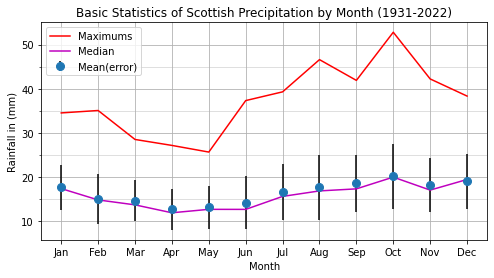

In [11]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.linspace(0,12,12), months)
x = np.linspace(0,12,12)
y = means 
yerr = std_dev

major_tick = [10, 20, 30, 40, 50]
minor_tick = [5, 15, 25, 35, 45]
ax.set_yticks(major_tick) # Grid
ax.set_yticks(minor_tick, minor=True)

ax.grid(which='both')

ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=1)

plt.plot(x, maxiums, label = 'Maximums' , color = 'r')
plt.plot(x, medians, label = 'Median' , color = 'm' )
#plt.plot(miniums, label = 'Miniums')
plt.errorbar(x, y , yerr=yerr, ecolor = 'black' , label='Mean(error)', fmt='o', markersize=8)
plt.legend(loc='upper left')

plt.xlabel("Month")
plt.ylabel("Rainfall in (mm)")
plt.title("Basic Statistics of Scottish Precipitation by Month (1931-2022)")
plt.savefig("Basic Statistics of Scottish Precipitation by Month (1931-2022)")

plt.show()

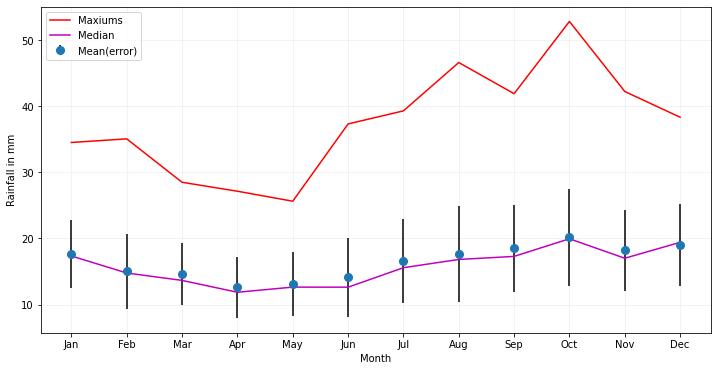

In [12]:
# Creating a graph 

plt.figure(figsize=(12,6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.linspace(0,12,12), months)
x = np.linspace(0,12,12)
y = means 
yerr = std_dev

plt.plot(x, maxiums, label = 'Maxiums' , color = 'r')
plt.plot(x, medians, label = 'Median' , color = 'm' )
#plt.plot(miniums, label = 'Miniums')
plt.errorbar(x, y , yerr=yerr, ecolor = 'black' , label='Mean(error)', fmt='o', markersize=8)
plt.legend(loc='upper left')

plt.xlabel("Month")
plt.ylabel("Rainfall in mm")
plt.grid(which='major', alpha=0.2)

plt.show()


## Question 3: Splitting into Seasons and finiding seasonal maxiums ##

In [13]:
# This is a transpose of data set of all the monthly maxiums for each year 
# The columns are the year 1931-1932... 2023
# The rows are the Month Jan, Feb .. Dec 

# As such we have 12 lists of 92 values for each month, the reasons it doesn't look nice is it's too big

#print(np.shape(all_maxima_t))
#print(all_maxima_t)

In [14]:
# Creating our Cold dataset May-Oct

# Trying to understand slicing 
# Left side seems to be the row, right seems to be the columns?
# start:end:step 

# Slice of the original data to get colder months 

Jan_Apr_data = all_maxima_t [0:4, :]
Nov_Dec_data = all_maxima_t [10:12, :]

# Checking them 


In [15]:
# Looking a shape of colder month arrays 

print(np.shape(Jan_Apr_data))
print(np.shape(Nov_Dec_data))

# Creating an array of zeros to try allow the combination of colder month arrays 

#array_2d = np.zeros((2, 92))
#print(np.shape(array_2d))
#print(array_2d)

# Trying to combine my zeros to create same sized arrays

# Wee_Zeros = np.concatenate((Nov_Dec_data, array_2d), axis=1)
# print(Wee_Zeros)
# print(np.shape(Wee_Zeros))

# Trying to combine but concatenate function 

Cold_season = np.concatenate((Nov_Dec_data, Jan_Apr_data), axis = 0 )
print(np.shape(Cold_season))

Cold_season_t = np.transpose(Cold_season)
#print(Cold_season_t)

# Looking at the cold seasons transpose shape 

#print(Cold_season_t)
#print(all_maxima_t)

(4, 92)
(2, 92)
(6, 92)


In [16]:
# Finding the basics statitsics for Cold_season

# Initialising Lists for max, min, mean and std

a = Cold_season_t
maxiums_cold = []
miniums_cold = []
means_cold  = []
medians_cold = []
std_dev_cold = []
Range_cold = np.subtract(maxiums_cold, miniums_cold)
 
# finding max, min, mean and std with a loop

for p in a:
    maxiums_cold.append(max(p))
 
for c in a:
    miniums_cold.append(min(c))
    
for d in a:
    means_cold.append(np.mean(d))
    
for e in a:
    std_dev_cold.append(np.std(e))

for f in a:
    medians_cold.append(np.median(f))
    
# printing the list to check them

#print(np.shape(maxiums_cold))
#print(miniums_cold)
#print(means_cold)
#print(medians_cold)
#print(std_dev_cold)

# Define labels, positions, bar heights and error bar heights


In [17]:
# Trying to create a list of 1931 - 2023 for my plot

# with integers within given range
  
def createList(r1, r2):
    return list(range(r1, r2+1, 4))
     
# Driver Code

r1, r2 = 1931, 2023

Years = (createList(r1, r2))

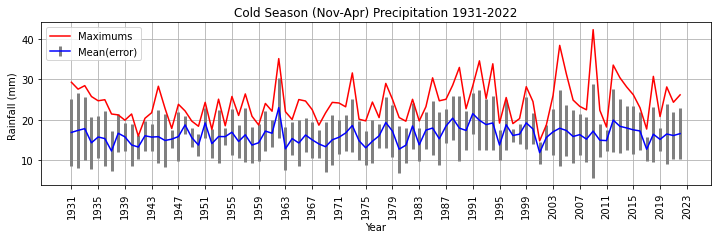

In [18]:
# Creating a graph 

plt.figure(figsize=(12,3))
plt.xticks(np.arange(0,93,4), Years,  rotation=90)
x = np.arange(0,92)
y = maxiums_cold
yerr = std_dev_cold

plt.plot(x, y, label = 'Maximums' , color = 'r')
#plt.plot(x, medians_cold, label = 'Median' , color = 'm' )
#plt.plot(miniums_cold, label = 'Miniums')
plt.errorbar(x, means_cold , yerr=yerr , label='Mean(error)', ecolor='grey', elinewidth=3, fmt = 'b')
plt.legend(loc='upper left')

plt.xlabel("Year")
plt.ylabel("Rainfall (mm) ")
plt.title("Cold Season (Nov-Apr) Precipitation 1931-2022")
plt.grid()

plt.savefig("Figure 2a: Cold_Seasons",bbox_inches='tight')
plt.show()

In [19]:
# Creating our Warm dataset May-Oct

May_Oct_data = all_maxima_t [4:10, :]

# print(May_Oct_data)

In [20]:
# Looking a shape of warmer month array

print(np.shape(May_Oct_data))

Warm_season_t = np.transpose(May_Oct_data)

# Looking at the Warm seasons transpose shape 

print(np.shape(Warm_season_t))

# checking things 

#print(Warm_season_t)

(6, 92)
(92, 6)


In [21]:
# Finding the basics statitsics for Warm_season

# Initialising Lists for max, min, mean and std

z = Warm_season_t
maxiums_warm = []
miniums_warm = []
means_warm  = []
medians_warm = []
std_dev_warm = []
Range_warm = np.subtract(maxiums_cold, miniums_cold)
 
# finding max, min, mean and std with a loop

for p in z:
    maxiums_warm.append(max(p))
 
for c in z:
    miniums_warm.append(min(c))
    
for d in z:
    means_warm.append(np.mean(d))
    
for e in z:
    std_dev_warm.append(np.std(e))

for f in z:
    medians_warm.append(np.median(f))
    
# printing the list to check them

print(maxiums_warm)
#print(miniums_warm)
#print(means_warm)
#print(medians_warm)
#print(std_dev_warm)

# Define labels, positions, bar heights and error bar heights

[37.31, 21.8, 18.03, 27.4, 24.66, 26.92, 22.71, 29.86, 26.86, 23.6, 22.0, 32.35, 25.66, 20.29, 24.34, 22.36, 23.94, 27.6, 36.65, 33.97, 17.9, 19.42, 19.16, 30.4, 16.81, 39.29, 19.58, 38.65, 30.95, 25.94, 39.5, 27.47, 20.57, 26.4, 32.93, 33.94, 19.98, 23.87, 19.15, 32.64, 24.58, 22.37, 18.72, 12.77, 27.92, 24.37, 30.68, 23.16, 20.53, 29.06, 41.89, 23.44, 18.84, 29.49, 27.68, 22.79, 26.91, 24.07, 21.01, 26.28, 24.22, 21.95, 18.93, 12.76, 27.65, 24.94, 23.84, 32.03, 23.13, 24.24, 22.88, 34.87, 13.93, 29.02, 31.18, 33.57, 27.05, 22.74, 38.59, 28.14, 32.76, 30.05, 18.8, 46.6, 20.45, 17.32, 34.44, 25.21, 26.47, 52.81, 29.38, 21.55]


In [22]:
# Trying to create a list of 1931 - 2023 for my plot

# with integers within given range
  
def createList(r1, r2):
    return list(range(r1, r2+1, 4))
     
# Driver Code

r1, r2 = 1931, 2023

Years = (createList(r1, r2))

print(np.shape(Years))
print(Years)

(24,)
[1931, 1935, 1939, 1943, 1947, 1951, 1955, 1959, 1963, 1967, 1971, 1975, 1979, 1983, 1987, 1991, 1995, 1999, 2003, 2007, 2011, 2015, 2019, 2023]


In [23]:
print(np.shape(all_maxima_t))
print(np.shape(maxiums_warm))

(12, 92)
(92,)


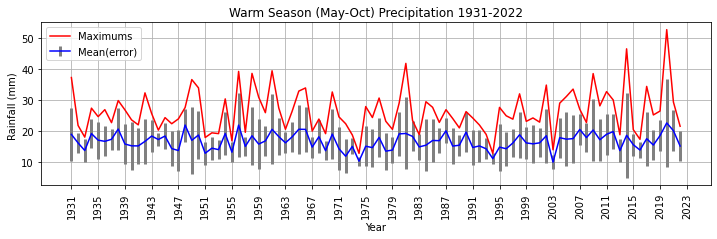

In [24]:
# Creating a graph 

plt.figure(figsize=(12,3))
plt.xticks(np.arange(0,93,4), Years,  rotation=90)
x = np.arange(0,92)
y = maxiums_warm
yerr = std_dev_warm

plt.plot(x, y, label = 'Maximums' , color = 'r')
#plt.plot(x, maxiums_warm, label = 'MaxiumsMonth' , color = 'r')
#plt.plot(x, medians_cold, label = 'Median' , color = 'm' )
#plt.plot(miniums_cold, label = 'Miniums')
plt.errorbar(x, means_warm , yerr=yerr , label='Mean(error)', ecolor='grey', elinewidth=3, fmt = 'b')
plt.legend(loc='upper left')

plt.xlabel("Year")
plt.ylabel("Rainfall (mm) ")
plt.title("Warm Season (May-Oct) Precipitation 1931-2022")
plt.grid()

plt.savefig("Figure 2b: Warm_Seasons", bbox_inches='tight')
plt.show()

## Question 4: Producing the diagnositc plots and histograms ##

In [25]:
# Changing monthly maxium to correct shape from 1931-2022

arr = all_maxima

all_maxima_monthly = arr.reshape(-1)

# Checking it worked 

#print(all_maxima_monthly)
print(np.shape(all_maxima_monthly))

# Changeing monthly maxima array for Warm and cold seasons

arr1 = Warm_season_t
print(np.shape(Warm_season_t))
arr2 = Cold_season_t 
print(np.shape(Cold_season_t))

Warm_monthly_maxima = arr1.reshape(-1)
Cold_monthly_maxima = arr2.reshape(-1)

# Checking it worked

#print(np.shape(Warm_monthly_maxima))
#print(np.shape(Cold_monthly_maxima))

(1104,)
(92, 6)
(92, 6)


In [26]:
# Checking the data seems to be a mistake (fixed it partly)

#print(maxiums_warm)
#print(Warm_monthly_maxima)
#print(np.shape(maxiums_warm))
#print(np.shape(Warm_monthly_maxima))
#print(maxiums_warm.dtype)
#type(Warm_monthly_maxima.dtype)

#print(maxiums_cold)
#print(all_maxima)
#print(Cold_monthly_maxima)

#range_seasonal = np.max(maxiums_warm) - np.min(maxiums_warm)
#range_monthly = np.max(Warm_monthly_maxima) - np.min(Warm_monthly_maxima)

#print(range_seasonal)
#print(range_monthly)

## Trying to solve problem of ticks 

What I have come to realise is that the x axis of my two datasets are different; I have tried to join them on the y axis. By using ax.twiny(). This however has caused a problem of creating a strange 0-1 x and y tick. A tick is just the way that matplotlib marks data points on an axis. To set them to be invisible on a joined axis subplot we can use the bit of code ax.set_xticks([]) or ax.set_yticks([]). Another feature I want to get my head around is ax.tick_params() which seemingly allows us to alter the ticks, the gridlines and tick labels. 

Example of ax.twinx() https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py

Example of ax.set_xticks() https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html

Example of ax.tick_params() https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html

Below I have removed all the fluff of the set.ticks and tick.paramters and let matplotlib take over. There are a few issues with this I want to try and solve. 

How can I change the base ticks of 0-1 on x and y to the precipitaiton values on y and the months for ax and years for ax2?

How can I set the spefic months and years for ax, ax2? 

How can I add nice gridlines?

The problem I am running into for the first part I think is about how matplotlib configures the joining of the Y axis as the X axis are also different. I want to try look into the functoin linear locator. This function is an automatic tick function. I'm really struggling to fix this image however I'm close to an accurate image I do just need to remove the scales now.  

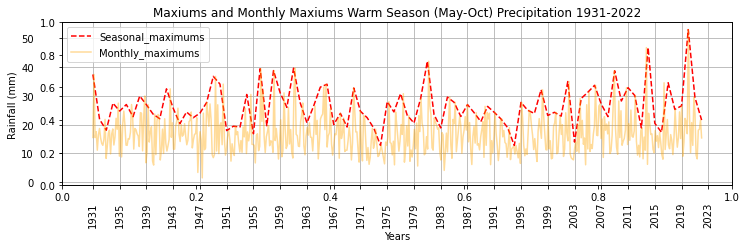

In [27]:
# Creating a plot to compare monthly and seasonal changes from 1931 to 2022

x_warm = np.arange(0,92)
y_warm = maxiums_warm

x_warm_monthly_max = np.arange(0,552)
y_warm_monthly_max = Warm_monthly_maxima

# Creating the figure and sub plots

fig=plt.figure(figsize=(12,3))

ax=fig.add_subplot(111, label="1")
plt.xticks(np.arange(0,93,4), Years,  rotation=90)
ax2=fig.add_subplot(111, label="3", frame_on=False)

# Creating monthly line one 

lns1 = ax.plot(x_warm, y_warm , color="red", label='Seasonal_maximums' , linestyle = '--')
ax.set_xlabel("Years", color="black")
ax.set_ylabel("Rainfall (mm)", color="black")
ax.tick_params(axis='y', colors="black", pad = 25)
ax.tick_params(axis='x', colors="black", pad = 12.5)
ax.grid()


# Connecting both lines to same y axis 

ax2 = ax.twiny()
#ax2 = ax.twinx()
#ax2= ax.twinx().twiny()

# Creating seasonal line two 

lns2 = ax2.plot(x_warm_monthly_max, y_warm_monthly_max , color="orange" , alpha = 0.4 , label='Monthly_maximums' )
ax2.set_xticks([])

# Creating the legend



leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax.legend(leg, labs, loc=0)


plt.title("Maxiums and Monthly Maxiums Warm Season (May-Oct) Precipitation 1931-2022")
plt.savefig("Figure 3b: Warm_season_and_monthly_maxiums", bbox_inches='tight')
plt.show()

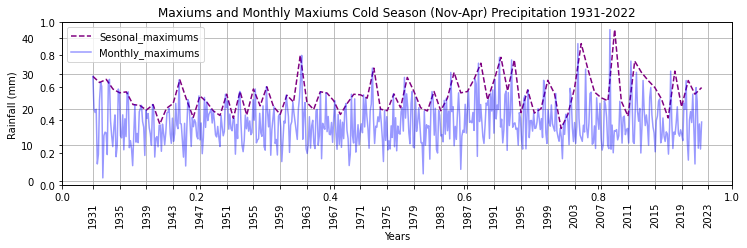

In [28]:
# Creating a plot to compare cold monthly and cold seasonal changes from 1931 to 2022

x_warm = np.arange(0,92)
y_warm = maxiums_cold

x_warm_monthly_max = np.arange(0,552)
y_warm_monthly_max = Cold_monthly_maxima

# Creating the figure and sub plots

fig=plt.figure(figsize=(12,3))

ax=fig.add_subplot(111, label="1")
plt.xticks(np.arange(0,93,4), Years,  rotation=90)
ax2=fig.add_subplot(111, label="3", frame_on=False)

# Creating monthly line one 

lns1 = ax.plot(x_warm, y_warm , color="purple", label='Sesonal_maximums' , linestyle = '--')
ax.set_xlabel("Years", color="black")
ax.set_ylabel("Rainfall (mm)", color="black")
ax.tick_params(axis='y', colors="black", pad = 25)
ax.tick_params(axis='x', colors="black", pad = 12.5)
ax.grid()


# Connecting both lines to same y axis 

ax2 = ax.twiny()
#ax2 = ax.twinx()
#ax2= ax.twinx().twiny()

# Creating seasonal line two 

lns2 = ax2.plot(x_warm_monthly_max, y_warm_monthly_max , color="blue" , alpha = 0.4 , label='Monthly_maximums' )
ax2.set_xticks([])

# Creating the legend

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax.legend(leg, labs, loc=2)


plt.title("Maxiums and Monthly Maxiums Cold Season (Nov-Apr) Precipitation 1931-2022")
plt.savefig("Figure 3a: Cold_season_and_monthly_maxiums", bbox_inches='tight')
plt.show()

(552,)


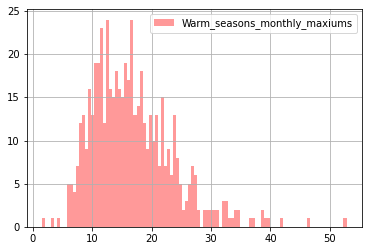

(552,)


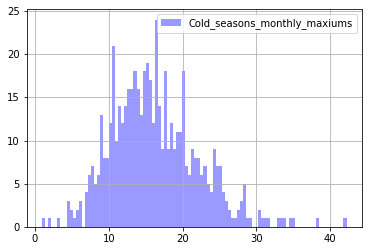

In [29]:
x_cold = Cold_monthly_maxima
x_warm = Warm_monthly_maxima

plt.hist(x_warm , bins = 100 , color="red", label='Warm_seasons_monthly_maxiums', alpha = 0.4)
print(np.shape(x_warm))
plt.grid()
plt.legend()
plt.show()

plt.hist(x_cold , bins = 100 , color="blue", label='Cold_seasons_monthly_maxiums', alpha = 0.4)
print(np.shape(x_cold))
plt.grid()
plt.legend()
plt.show()

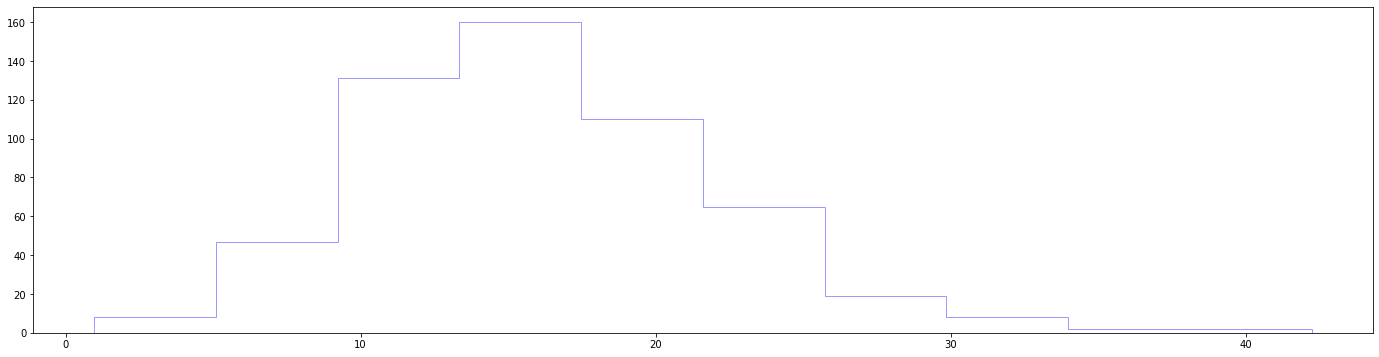

In [30]:
x_cold = Cold_monthly_maxima

fig=plt.figure(figsize=(24,6))

counts, bins = np.histogram(x_cold)
plt.stairs(counts, bins, color="b" ,label='cold_season_monthly_maxiums', alpha = 0.4)

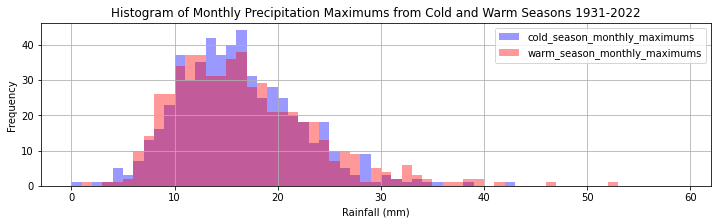

In [31]:
# Creating Histograms of the seasonal maxiums 
x_cold = Cold_monthly_maxima
x_warm = Warm_monthly_maxima
bins = np.arange(0,60,1)

fig=plt.figure(figsize=(12,3))

plt.hist(x_cold, bins , color="b" ,label='cold_season_monthly_maximums', alpha = 0.4)
plt.hist(x_warm , bins , color="r", label='warm_season_monthly_maximums', alpha = 0.4)
ax.set_ylabel("Frequency", color="black")
ax.set_xlabel("Rainfall (mm)", color="black")


plt.grid()
plt.title("Histogram of Monthly Precipitation Maximums from Cold and Warm Seasons 1931-2022")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency", color="black")
plt.savefig("Cold_season_and_monthly_maxiums")
plt.style.use("default")
plt.legend(loc='upper right')
plt.savefig("Figure 4a: Histogram comparision of Monthly Seasonal Precipitation maximums 1931-2022", bbox_inches='tight')
plt.show()

# Trying things out 

In [32]:
# Trying to see how two 45 years compare from the same seasons (warm)

First_45_warm = Warm_monthly_maxima [0:270]
Second_45_warm = Warm_monthly_maxima [282:552]

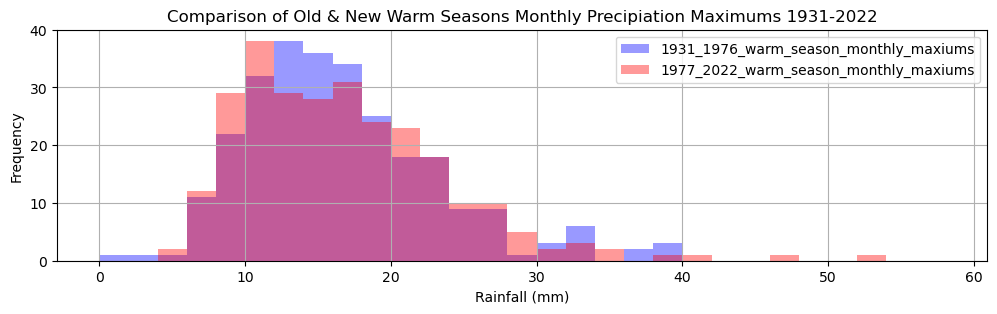

In [33]:
# Creating Histograms of the seasonal maxiums 
x_1931_1976_warm = First_45_warm
x_1977_2022_warm = Second_45_warm
bins = np.arange(0,60,2)

fig=plt.figure(figsize=(12,3))

plt.hist(x_1931_1976_warm , bins , color="b" ,label='1931_1976_warm_season_monthly_maxiums', alpha = 0.4)
plt.hist(x_1977_2022_warm , bins , color="r", label='1977_2022_warm_season_monthly_maxiums', alpha = 0.4)
plt.yticks(np.arange(0,50,10))
ax.set_ylabel("Frequency", color="black")
ax.set_xlabel("Rainfall (mm)", color="black")


plt.grid()
plt.title("Comparison of Old & New Warm Seasons Monthly Precipiation Maximums 1931-2022")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency", color="black")
plt.savefig("Cold_season_and_monthly_maxiums")
plt.style.use("default")
plt.legend(loc='upper right')
plt.savefig("Figure 4b: Comparison of Old & New Warm Seasons Monthly Precipiation Maximums 1931-2022", bbox_inches='tight')
plt.show()

# Trying things out 

In [34]:
# Trying to see how two 45 years compare from the different seasons (cold)

First_45_cold = Cold_monthly_maxima [0:270]
Second_45_cold = Cold_monthly_maxima [282:552]

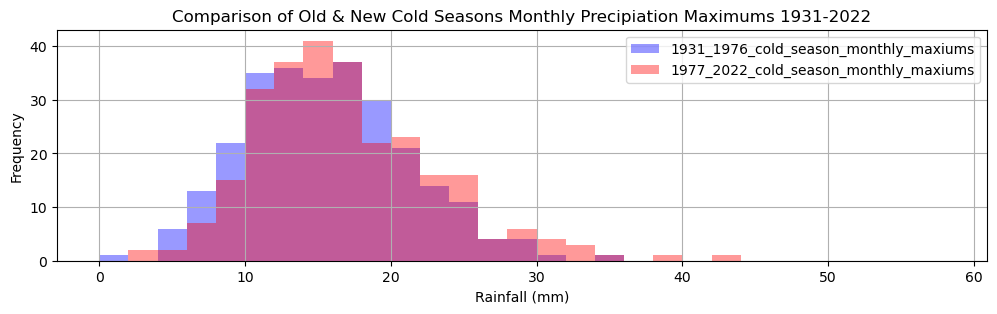

In [35]:
# Creating Histograms of the seasonal maxiums 
x_1931_1976_cold = First_45_cold
x_1977_2022_cold = Second_45_cold
bins = np.arange(0,60,2)

fig=plt.figure(figsize=(12,3))

plt.hist(x_1931_1976_cold, bins , color="b" ,label='1931_1976_cold_season_monthly_maxiums', alpha = 0.4)
plt.hist(x_1977_2022_cold , bins , color="r", label='1977_2022_cold_season_monthly_maxiums', alpha = 0.4)
ax.set_ylabel("Frequency", color="black")
ax.set_xlabel("Rainfall (mm)", color="black")


plt.grid()
plt.title("Comparison of Old & New Cold Seasons Monthly Precipiation Maximums 1931-2022")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency", color="black")
plt.savefig("Cold_season_and_monthly_maxiums")
plt.style.use("default")
plt.legend(loc='upper right')
plt.savefig("Figure 4c: Comparison of Old & New Cold Seasons Monthly Precipiation Maximums 1931-2022", bbox_inches='tight')
plt.show()

# Trying things out 

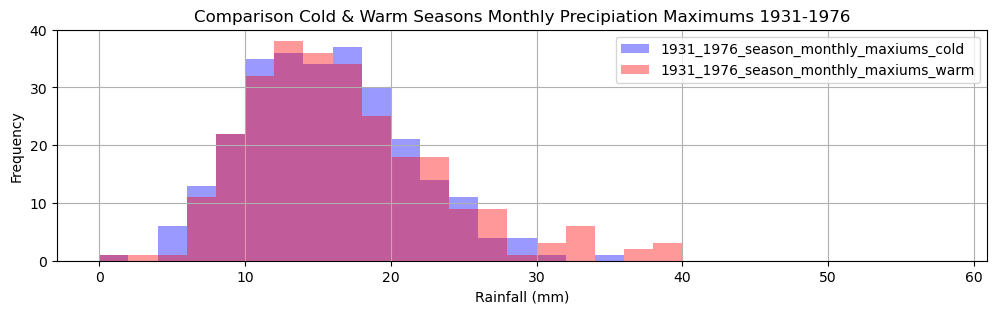

In [36]:
# Creating Histograms of the seasonal maxiums 

bins = np.arange(0,60,2)
fig=plt.figure(figsize=(12,3))

plt.hist(x_1931_1976_cold, bins , color="b" ,label='1931_1976_season_monthly_maxiums_cold', alpha = 0.4)
plt.hist(x_1931_1976_warm , bins , color="r", label='1931_1976_season_monthly_maxiums_warm', alpha = 0.4)


ax.set_ylabel("Frequency", color="black")
ax.set_xlabel("Rainfall (mm)", color="black")
plt.yticks(np.arange(0,50,10))


plt.grid()
plt.title("Comparison Cold & Warm Seasons Monthly Precipiation Maximums 1931-1976")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency", color="black")
plt.savefig("Cold_season_and_monthly_maxiums")
plt.style.use("default")
plt.legend(loc='upper right')
plt.savefig("Figure 4d: Comparison Cold & Warm Seasons Monthly Precipiation Maximums 1931-1976", bbox_inches='tight')
plt.show()

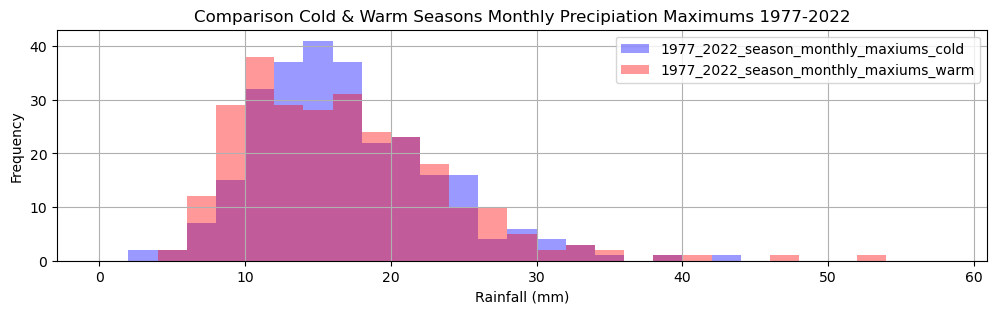

In [37]:
bins = np.arange(0,60,2)

fig=plt.figure(figsize=(12,3))

plt.hist(x_1977_2022_cold , bins , color="blue", label='1977_2022_season_monthly_maxiums_cold', alpha = 0.4)
plt.hist(x_1977_2022_warm , bins , color="red", label='1977_2022_season_monthly_maxiums_warm', alpha = 0.4)


ax.set_ylabel("Frequency", color="black")
ax.set_xlabel("Rainfall (mm)", color="black")


plt.grid()
plt.title("Comparison Cold & Warm Seasons Monthly Precipiation Maximums 1977-2022")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency", color="black")
plt.savefig("Cold_season_and_monthly_maxiums")
plt.style.use("default")
plt.legend(loc='upper right')
plt.savefig("Figure 4e: Comparison Cold & Warm Seasons Monthly Precipiation Maximums 1977-2022", bbox_inches='tight')
plt.show()

## Question 5 Finding GEV parameters and completing goodness of fit plots 

Genextreme fit uses maximum likelihood estimation (MLE) 

This is a is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by minisming the log likelihood function so that,  under the assumed statistical model, the observed data is most probable. I then completed a goodness of fit plots using the histogram densities and a quanitle quaintile plot. 

Still working on how to find erros in the data, to allow me to create errors for the return periods

In [38]:
#print(maxiums_cold)

In [39]:
# genextreme fit uses maximum likelihood estimation (MLE) 

print(genextreme.fit(maxiums_warm))
print(genextreme.fit(maxiums_cold))

(0.06426627734331769, 23.376541729498797, 5.930901059860507)
(0.027164100426367875, 22.032763402848417, 3.989918335797122)


In [40]:
# Basic Statistics: This is just putting in the shape parameter and finding out the variance, mean, skew and 

#mean, var, skew, kurt = genextreme.stats(c_COLD ,loc_cold,scale_cold, moments='mvsk')

#c = 0.06426627734331769
#loc = 23.376541729498797
#scale = 5.930901059860507

#c_cold = 0.027164100426367875
#loc_cold = 22.032763402848417
#scale_cold = 3.989918335797122

#print(mean)
#print(var)
#print(skew)
#print(kurt)


In [41]:
# Trying to find the condience intervals (not great for error!)

c = 0.06426627734331769
loc = 23.376541729498797
scale = 5.930901059860507

c_cold = 0.027164100426367875
loc_cold = 22.032763402848417
scale_cold = 3.989918335797122

# Creating confidence levels for return periods 

# confidence = [1-1/5, 1-1/10, 1-1/20, 1-1/50, 1-1/100,1-1/500,1-1/1000]
#confidence = genextreme.cdf(0.999, c, loc, scale)

# Creating the x and y_low and y_high values 

#x = np.log([5,10,20,50,100,500,1000])

#Confidence_intervals = genextreme.interval(confidence, c_cold, loc_cold, scale_cold)
#print(Confidence_intervals)

#Combine = np.concatenate(Confidence_intervals)

#y_low = Combine [:7]
#y_high = Combine [7:14]

# Creating the x and y_low and y_high values warm 

#x = np.log([5,10,20,50,100,500,1000])

#Confidence_intervals_warm = genextreme.interval(confidence, c, loc, scale)
#Combine = np.concatenate(Confidence_intervals_warm)

#y_low_warm = Combine [:7]
#y_high_warm = Combine [7:14]

# Creating a quick graph to test them 

#plt.plot(x, y_low, color = "b" , linestyle = "--")
#plt.plot(x, y_high, color = "b" , linestyle = "--")

#plt.plot(x, y_low_warm, color = "r" , linestyle = "--")
#plt.plot(x, y_high_warm, color = "r" , linestyle = "--")


# print(genextreme.interval(confidence, c, loc, scale))


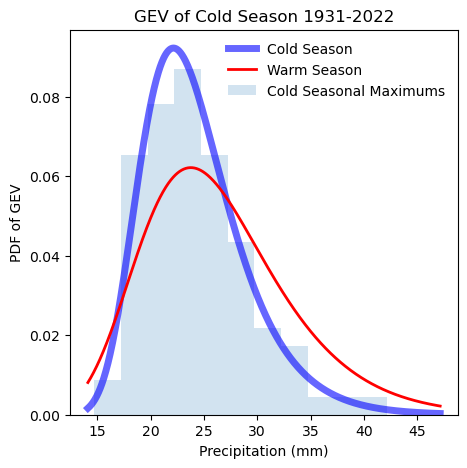

In [42]:
# Just creating a figure and an axis/subplot

fig, ax = plt.subplots(1, 1, figsize=(5,5))

c = 0.06426627734331769
loc = 23.376541729498797
scale = 5.930901059860507

c_cold = 0.027164100426367875
loc_cold = 22.032763402848417
scale_cold = 3.989918335797122

# Section 2: Display the probability density function (pdf) however uses x as the ppf of our extreme value distrubtion.
# The ppf is the probability point function, the inverse of the cdf where everthing thing left of that point is equal to y
# Presumably they use this instead as a line created from a certain range as is better desribe the shape of the GEV function
# As such I will stick too it

x = np.linspace(genextreme.ppf(0.001, c_cold,loc_cold,scale_cold),
                genextreme.ppf(0.999, c_cold,loc_cold,scale_cold), 1000)
ax.plot(x, genextreme.pdf(x, c_cold,loc_cold,scale_cold),
       'blue', lw=5, alpha=0.6, label='Cold Season')

# Section 3: Freeze the distribution and display the frozen pdf this is creating another pdf
# A pdf of the warm seasons to show the differences between them 

rv = genextreme(c,loc,scale)
ax.plot(x, rv.pdf(x), 'red', lw=2, label='Warm Season')

# Section 4: Check accuracy of cdf and ppf and that they do infact equal each other's inverse 
# The main function is np.allclose which checks if two arrays are simlair element wise 

vals = genextreme.ppf([0.001, 0.5, 0.999], c_cold,loc_cold,scale_cold)
np.allclose([0.001, 0.5, 0.999], genextreme.cdf(vals, c_cold,loc_cold,scale_cold))
True

# Section 5: Inputing histogram data 

r2 = maxiums_cold

# Section 6: And compare the histogram:

ax.hist(r2, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label='Cold Seasonal Maximums')
ax.set_xlabel('Precipitation (mm)')
ax.set_ylabel('PDF of GEV')
ax.legend(loc='best', frameon=False)
ax.set_title('GEV of Cold Season 1931-2022')
plt.savefig("Figure 5a: GEV of Cold Season 1931-2022", bbox_inches='tight')
plt.show()

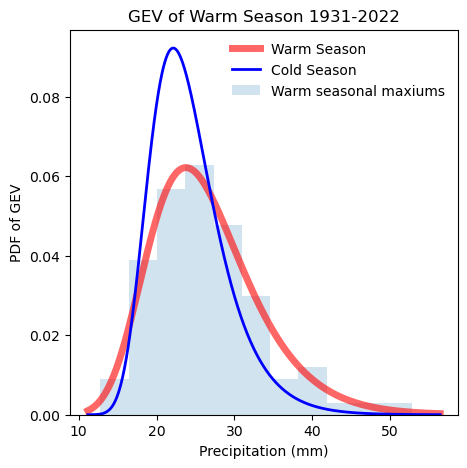

In [43]:
# Just creating a figure and an axis/subplot

fig, ax = plt.subplots(1, 1, figsize=(5,5))

c = 0.06426627734331769
loc = 23.376541729498797
scale = 5.930901059860507

c_cold = 0.027164100426367875
loc_cold = 22.032763402848417
scale_cold = 3.989918335797122


# Section 2: Display the probability density function (pdf) however uses x as the ppf which makes sense (see above)

x = np.linspace(genextreme.ppf(0.001, c,loc,scale),
                genextreme.ppf(0.999, c,loc,scale), 1000)
ax.plot(x, genextreme.pdf(x, c, loc, scale),
       'red', lw=5, alpha=0.6, label='Warm Season')

# Section 3: Freeze the distribution and display the frozen pdf:

rv = genextreme(c_cold,loc_cold,scale_cold)
ax.plot(x, rv.pdf(x), 'blue', lw=2, label='Cold Season')

# Section 5: Inputing histogram data 


r2 = maxiums_warm

# Section 6: And compare the histogram:

ax.hist(r2, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label= 'Warm seasonal maxiums')
ax.set_xlabel('Precipitation (mm)')
ax.set_ylabel('PDF of GEV')
ax.legend(loc='best', frameon=False)
ax.set_title('GEV of Warm Season 1931-2022')
plt.savefig("Figure 5b: GEV of Warm Season 1931-2022", bbox_inches='tight')
plt.show()

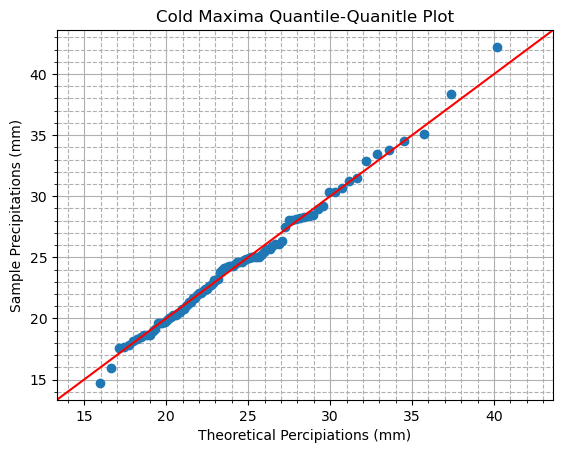

In [44]:
quantile_cold = np.array(maxiums_cold)

fig = sm.qqplot(quantile_cold, stats.gumbel_r, a = 0.027164100426367875, loc = 22.032763402848417, scale = 3.989918335797122 , line = "45")
plt.title("Cold Maxima Quantile-Quanitle Plot")
plt.ylabel("Sample Precipitations (mm)")
plt.xlabel("Theoretical Percipiations (mm)")

# Creating Grid
plt.figsize=(5,5)
plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle='--')
plt.minorticks_on()

plt.savefig("Figure 5c: Cold Maximums Quantile-Quanitle 1931-2022")
plt.show()



<Figure size 500x500 with 0 Axes>

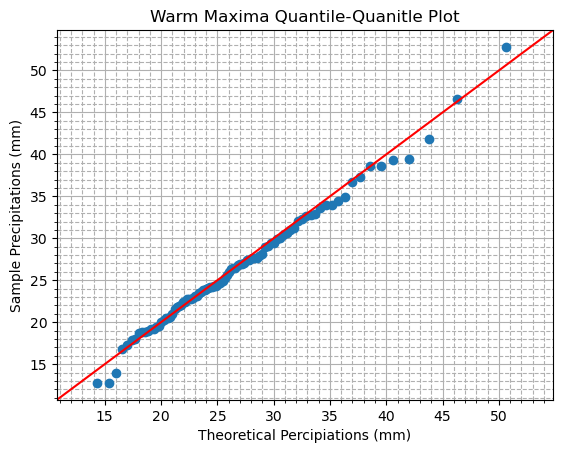

In [45]:
quantile_warm = np.array(maxiums_warm)



plt.figure(figsize=(5,5))

fig = sm.qqplot(quantile_warm, stats.gumbel_r, a = 0.06426627734331769, loc = 23.376541729498797, scale = 5.930901059860507 , line = "45")

plt.title("Warm Maxima Quantile-Quanitle Plot")
plt.ylabel("Sample Precipitations (mm)")
plt.xlabel("Theoretical Percipiations (mm)")


plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle='--')
plt.minorticks_on()


plt.savefig("Figure 5d: Warm Maximums Quantile-Quanitle 1931-2022")
plt.show()

## Question 6: Return Period Caculations ##

The return period is calculated by taking inverse of the survival function of 1/return period. As such 1/return period is known as the probability of exceedance. This is the chance an event will be a certain magntiude in a certain number of years. Given the values of the distrubiton that we are modelling it with. AS such find the errors of the parameters and we will find the error of the return periods

In [46]:
data = quantile_warm 

# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(data)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

# Compute the return levels for several return periods.
return_periods = np.array([5, 10, 20, 50, 100,500,1000])
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

print("Return levels:")
print()
print("Period    Precipitaiton")
print("(years)   (mm)")

for period, level in zip(return_periods, return_levels):
    print(f'{period:4.0f}  {level:9.2f}')

Fit parameters:
  shape: 0.0643
  loc:   23.3765
  scale: 5.9309

Return levels:

Period    Precipitaiton
(years)   (mm)
   5      31.86
  10      35.80
  20      39.41
  50      43.85
 100      47.00
 500      53.76
1000      56.46


In [47]:
data = quantile_cold

# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(data)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

# Compute the return levels for several return periods.
return_periods = np.array([5, 10, 20, 50, 100,500,1000])
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

print("Return levels:")
print()
print("Period    Precipitaiton")
print("(years)   (mm)")

for period, level in zip(return_periods, return_levels):
    print(f'{period:4.0f}  {level:9.2f}')

Fit parameters:
  shape: 0.0272
  loc:   22.0328
  scale: 3.9899

Return levels:

Period    Precipitaiton
(years)   (mm)
   5      27.90
  10      30.74
  20      33.42
  50      36.80
 100      39.29
 500      44.85
1000      47.16


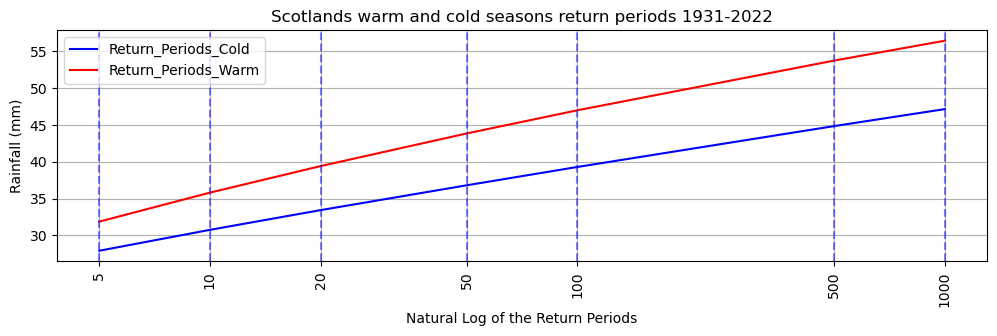

In [53]:
# Creating visualisation 

x = np.log([5,10,20,50,100,500,1000])

Scotland_cold =  [27.90, 30.74, 33.42, 36.80, 39.29, 44.85, 47.16]
Scotland_warm = [31.86, 35.80, 39.41, 43.85, 47.00, 53.76, 56.46]

fig=plt.figure(figsize=(12,3))

ax=fig.add_subplot(111, label="1")

lns1 = ax.plot(x, Scotland_cold, color="blue", label='Return_Periods_Cold')
lns2 = ax.plot(x, Scotland_warm, color="red", label='Return_Periods_Warm')



ax.set_xlabel("Natural Log of the Return Periods", color="black")
ax.set_ylabel("Rainfall (mm)", color="black")
ax.grid()



plt.axvline(x = 1.60943791, color = 'b', label = 'axvline - full height', linestyle = "--" , alpha = 0.5)
plt.axvline(x = 2.30258509, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
plt.axvline(x = 2.99573227, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
plt.axvline(x = 3.91202301, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
plt.axvline(x = 4.60517019, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
plt.axvline(x = 6.2146081, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
plt.axvline(x = 6.90775528, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)

plt.xticks([1.60943791, 2.30258509, 2.99573227, 3.91202301, 4.60517019, 6.2146081, 6.90775528],[5,10,20,50,100,500,1000] ,  rotation=90)

# Creating the legend

leg = lns1 + lns2 
labs = [l.get_label() for l in leg]
ax.legend(leg, labs, loc=2)

plt.title("Scotlands warm and cold seasons return periods 1931-2022")
plt.savefig("Figure 7aa: Change in Scotlands precipitation return periods",bbox_inches='tight')

## Question 7: Analsying Regions of Scotlands and change in Return periods ##

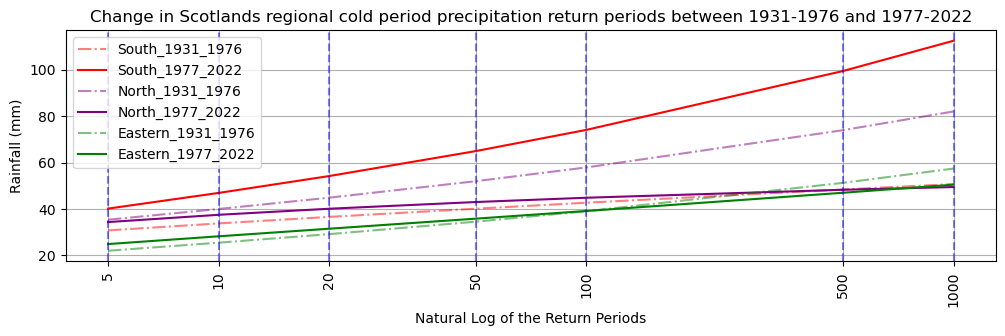

In [52]:
# Creating visualisation 

x = np.log([5,10,20,50,100,500,1000])

South_y_first_45_cold =  [30.81,33.81,36.62,40.14,42.71,48.41,50.76]
South_y_second_45_cold =  [40.19, 46.94, 54.21, 64.93, 74.06, 99.42, 112.46]
North_y_first_45_cold =   [35.41, 40.02, 44.90, 51.97, 57.90, 73.95, 82.02]
North_y_second_45_cold = [34.39, 37.52, 40.13, 43.01, 44.86, 48.29, 49.47]
Eastern_y_first_45_cold = [22.05, 25.51, 29.20, 34.56, 39.05, 51.27, 57.43]
Eastern_y_second_45_cold = [24.92, 28.26, 31.53, 35.85, 39.15, 47.01, 50.49]

fig=plt.figure(figsize=(12,3))

ax=fig.add_subplot(111, label="1")

lns3 = ax.plot(x, South_y_first_45_cold, color="red", label='South_1931_1976', linestyle = "dashdot" , alpha = 0.5 )
lns4 = ax.plot(x, South_y_second_45_cold, color="red", label='South_1977_2022')
lns10 = ax.plot(x, North_y_first_45_cold, color="purple", label='North_1931_1976' , linestyle = "dashdot" , alpha = 0.5)
lns11 = ax.plot(x, North_y_second_45_cold, color="purple", label='North_1977_2022' )
lns12 = ax.plot(x, Eastern_y_first_45_cold, color="green", label='Eastern_1931_1976' , linestyle = "dashdot" , alpha = 0.5)
lns13 = ax.plot(x, Eastern_y_second_45_cold, color="green", label='Eastern_1977_2022' )
ax.set_xlabel("Natural Log of the Return Periods", color="black")
ax.set_ylabel("Rainfall (mm)", color="black")
ax.grid()



lns5 = plt.axvline(x = 1.60943791, color = 'b', label = 'axvline - full height', linestyle = "--" , alpha = 0.5)
lns6 = plt.axvline(x = 2.30258509, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
lns7 = plt.axvline(x = 2.99573227, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
lns5 = plt.axvline(x = 3.91202301, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
lns6 = plt.axvline(x = 4.60517019, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
lns7 = plt.axvline(x = 6.2146081, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
lns8 = plt.axvline(x = 6.90775528, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)

plt.xticks([1.60943791, 2.30258509, 2.99573227, 3.91202301, 4.60517019, 6.2146081, 6.90775528],[5,10,20,50,100,500,1000] ,  rotation=90)

# Creating the legend

leg = lns3 + lns4 + lns10 + lns11 + lns12 + lns13
labs = [l.get_label() for l in leg]
ax.legend(leg, labs, loc=2)

plt.title("Change in Scotlands regional cold period precipitation return periods between 1931-1976 and 1977-2022")
plt.savefig("Figure 7a: Change in Scotlands regional winter precipitation return periods between 1931-1976 and 1977-2022",bbox_inches='tight')

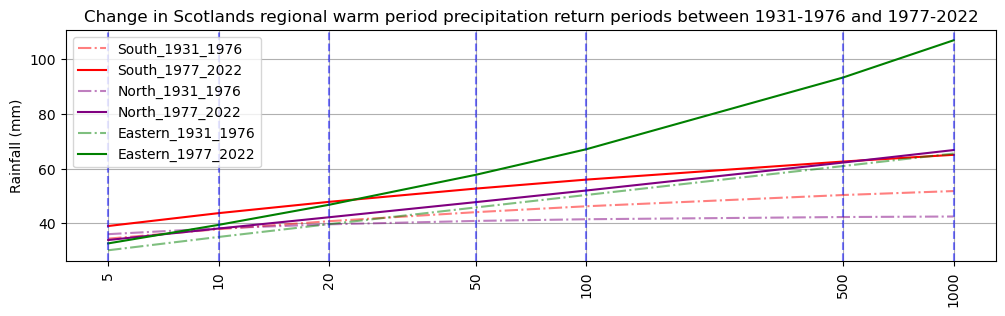

In [51]:
# Creating visualisation 

x = np.log([5,10,20,50,100,500,1000])

South_y_first_45_warm =  [34.35, 37.81, 40.75, 44.05, 46.21, 50.33,51.78]
South_y_second_45_warm =  [38.98, 43.70, 47.84, 52.68, 55.97, 62.59,65.06]
North_y_first_45_warm =   [35.99, 38.16, 39.60, 40.84, 41.46, 42.27, 42.46]
North_y_second_45_warm =  [33.85, 38.06, 42.20, 47.72, 51.98, 62.22, 66.80]
Eastern_y_first_45_warm =  [30.09, 34.98, 39.67, 45.77, 50.34, 60.94, 65.52]
Eastern_y_second_45_warm = [32.61, 39.41, 46.78, 57.72, 67.09, 93.37, 107.01]


fig=plt.figure(figsize=(12,3))

ax=fig.add_subplot(111, label="1")


lns3 = ax.plot(x, South_y_first_45_warm, color="red", label='South_1931_1976', linestyle = "dashdot" , alpha = 0.5 )
lns4 = ax.plot(x, South_y_second_45_warm, color="red", label='South_1977_2022')
lns10 = ax.plot(x, North_y_first_45_warm, color="purple", label='North_1931_1976' , linestyle = "dashdot" , alpha = 0.5)
lns11 = ax.plot(x, North_y_second_45_warm, color="purple", label='North_1977_2022' )
lns12 = ax.plot(x, Eastern_y_first_45_warm, color="green", label='Eastern_1931_1976' , linestyle = "dashdot" , alpha = 0.5)
lns13 = ax.plot(x, Eastern_y_second_45_warm, color="green", label='Eastern_1977_2022' )
ax.set_ylabel("Rainfall (mm)", color="black")
ax.grid()



lns5 = plt.axvline(x = 1.60943791, color = 'b', label = 'axvline - full height', linestyle = "--" , alpha = 0.5)
lns6 = plt.axvline(x = 2.30258509, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
lns7 = plt.axvline(x = 2.99573227, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
lns5 = plt.axvline(x = 3.91202301, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
lns6 = plt.axvline(x = 4.60517019, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
lns7 = plt.axvline(x = 6.2146081, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)
lns8 = plt.axvline(x = 6.90775528, color = 'b', label = 'axvline - full height', linestyle = "--", alpha = 0.5)

plt.xticks([1.60943791, 2.30258509, 2.99573227, 3.91202301, 4.60517019, 6.2146081, 6.90775528],[5,10,20,50,100,500,1000] ,  rotation=90)

# Creating the legend

leg = lns3 + lns4 + lns10 + lns11 + lns12 + lns13
labs = [l.get_label() for l in leg]
ax.legend(leg, labs, loc=2)

plt.title("Change in Scotlands regional warm period precipitation return periods between 1931-1976 and 1977-2022")
plt.savefig("Figure 7b: Change in Scotlands regional summer precipitation return periods between 1931-1976 and 1977-2022",bbox_inches='tight')